In [1]:
import os.path as op
import itertools

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
result_dir = op.abspath("../results")
data_dir = op.abspath("../data")
figure_dir = op.abspath("./Fig")

term neurosynth


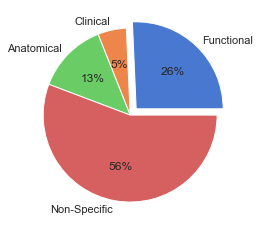

term neuroquery


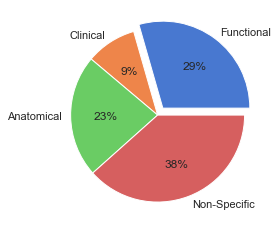

lda neurosynth


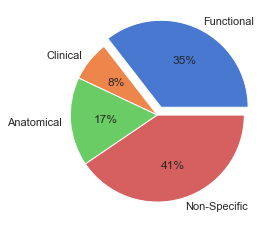

lda neuroquery


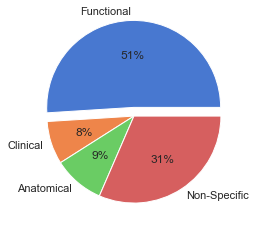

gclda neurosynth


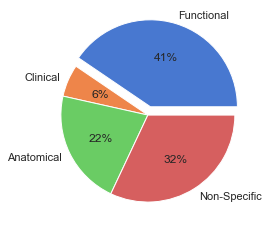

gclda neuroquery


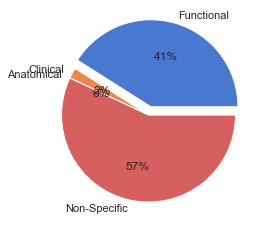

In [6]:
sns.set(style="white")

cotegories = np.array(["Functional", "Clinical", "Anatomical", "Non-Specific"])

colors = plt.get_cmap("Set1")

dset_names = ["neurosynth", "neuroquery"]
models = ["term", "lda", "gclda"]

method_lst = []
class_lst = []
for model, dset_name in itertools.product(models, dset_names):
    print(model, dset_name)
    data_df = pd.read_csv(op.join(data_dir, "classification", f"{model}_{dset_name}_classification.csv"))
    
    data = []
    for cotegory in cotegories:
        n_elements = data_df[data_df["Classification"] == cotegory].shape[0]
        data.append(n_elements)
        class_lst.append([cotegory] * n_elements)
        method_lst.append([f"{model}_{dset_name}"] * n_elements )
        
    explode = [0] * len(cotegories)
    explode[0] = 0.1

    palette_color = sns.color_palette('muted')

    # colors.colors[:len(keys)]
    plt.pie(data, labels=cotegories, colors=palette_color,
        explode=explode, autopct='%.0f%%')
    plt.show()
    
new_data_df = pd.DataFrame()
new_data_df["method"] = np.hstack(method_lst)
new_data_df["classification"] = np.hstack(class_lst)
    


In [7]:
new_data_df

,method,classification
0,term_neurosynth,Functional
1,term_neurosynth,Functional
2,term_neurosynth,Functional
3,term_neurosynth,Functional
4,term_neurosynth,Functional
...,...,...
10256,gclda_neuroquery,Non-Specific
10257,gclda_neuroquery,Non-Specific
10258,gclda_neuroquery,Non-Specific
10259,gclda_neuroquery,Non-Specific


In [17]:

cross_data_prop_df = pd.crosstab(index=new_data_df["method"],
                             columns=new_data_df["classification"],
                             normalize="index")
cross_data_prop_df = cross_data_prop_df[cotegories]
cross_data_prop_df = cross_data_prop_df.sort_index(ascending=False)
cross_data_prop_df

classification,Functional,Clinical,Anatomical,Non-Specific
method,,,,
term_neurosynth,0.256898,0.053283,0.132255,0.557564
term_neuroquery,0.294388,0.094166,0.227489,0.383957
lda_neurosynth,0.355000,0.075000,0.165000,0.405000
lda_neuroquery,0.510000,0.080000,0.095000,0.315000
gclda_neurosynth,0.405000,0.060000,0.215000,0.320000
gclda_neuroquery,0.410000,0.020000,0.000000,0.570000


In [16]:
cross_data_df = pd.crosstab(index=new_data_df["method"],
                             columns=new_data_df["classification"])
cross_data_df = cross_data_df[cotegories]
cross_data_df = cross_data_df.sort_index(ascending=False)
cross_data_df

classification,Functional,Clinical,Anatomical,Non-Specific
method,,,,
term_neurosynth,810,168,417,1758
term_neuroquery,1857,594,1435,2422
lda_neurosynth,71,15,33,81
lda_neuroquery,102,16,19,63
gclda_neurosynth,81,12,43,64
gclda_neuroquery,82,4,0,114


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


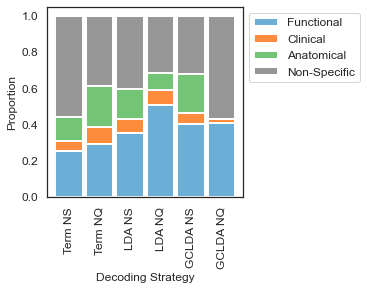

In [54]:
fontsize = 12
my_cmap = plt.get_cmap("tab20c")
idxes = [1, 5, 9, 17]
colors = [my_cmap.colors[idx] for idx in idxes]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(3.5, 3.5)

cross_data_prop_df.plot(
    kind='bar', 
    stacked=True, 
    color=colors,
    edgecolor='white', 
    linewidth=2,
    width=0.9,
    ax=ax,
)

ax.set_xticklabels(["Term NS", "Term NQ", "LDA NS", "LDA NQ", "GCLDA NS", "GCLDA NQ"], fontsize=fontsize)

ax.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1),
    ncol=1,
    fontsize=12,
)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax.set_xlabel("Decoding Strategy", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)

"""
for n, x in enumerate([*cross_data_df.index.values]):
    for (proportion, count, y_loc) in zip(cross_data_prop_df.loc[x],
                                          cross_data_df.loc[x],
                                          cross_data_prop_df.loc[x].cumsum()):
                
        plt.text(
            x=n - 0.17,
            y=(y_loc - proportion) + (proportion / 2),
            s=f'{count}', 
            color="black",
            fontsize=12,
            fontweight="bold"
        )
        plt.text(
            x=n - 0.2,
            y=(y_loc - proportion) + (proportion / 2) - 0.04,
            s=f'({int(np.round(proportion * 100))}%)', 
            color="black",
            fontsize=12,
            fontweight="bold"
        )
"""
plt.savefig(op.join("./Fig", "classification", "class_prop_barh.eps"), bbox_inches="tight")
plt.show()